<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Ukraine_Russia_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import nltk 
import re 
from nltk.corpus import stopwords 
import string


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Russia_Ukraine.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1607903149398044675,1607725010822602752,2022-12-28 00:55:58 UTC,2022-12-28,00:55:58,0,1569886246851477505,brandonhigdon16,Brandon Higdon,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'thebl4ckhand', 'name': 'Dark...",NaN,NaN,NaN,NaN
1,1607903139314663428,1607718113876795394,2022-12-28 00:55:56 UTC,2022-12-28,00:55:56,0,1603871182549311506,wolfsbin,WOLF 's Bin Survival en veel meer,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BBCSteveR', 'name': 'Steve R...",NaN,NaN,NaN,NaN
2,1607903137825701890,1607903137825701890,2022-12-28 00:55:56 UTC,2022-12-28,00:55:56,0,234994793,boatkinson1986,Bo Atkinson,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1607903135808512000,1607829942493974533,2022-12-28 00:55:55 UTC,2022-12-28,00:55:55,0,296705735,jnilsso,Jonas Nilsson,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'calbid1', 'name': 'Ronald Fr...",NaN,NaN,NaN,NaN
4,1607903127818174466,1603835477160755226,2022-12-28 00:55:53 UTC,2022-12-28,00:55:53,0,1478407508716838916,mikepol98488881,Mike pollock,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'alexaphilippou', 'name': 'Al...",NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
data.shape

(10006, 36)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10006 non-null  int64  
 1   conversation_id  10006 non-null  int64  
 2   created_at       10006 non-null  object 
 3   date             10006 non-null  object 
 4   time             10006 non-null  object 
 5   timezone         10006 non-null  int64  
 6   user_id          10006 non-null  int64  
 7   username         10006 non-null  object 
 8   name             10006 non-null  object 
 9   place            2 non-null      object 
 10  tweet            10006 non-null  object 
 11  language         10006 non-null  object 
 12  mentions         10006 non-null  object 
 13  urls             10006 non-null  object 
 14  photos           10006 non-null  object 
 15  replies_count    10006 non-null  int64  
 16  retweets_count   10006 non-null  int64  
 17  likes_count 

In [11]:
data = data[['username','tweet', 'language']]

In [12]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [14]:
data['language'].value_counts()

en     8755
pt      279
it      257
qme     201
in      118
und      86
ru       37
es       30
ca       28
ja       27
qht      23
de       17
fi       17
fr       14
nl       13
et       12
ro       10
th       10
qam       9
tr        9
sl        7
iw        6
pl        6
tl        5
sv        5
vi        4
ht        3
el        3
hi        2
no        2
uk        2
sr        1
bn        1
zh        1
zxx       1
lv        1
eu        1
ar        1
da        1
cs        1
Name: language, dtype: int64

In [15]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") 
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-15-b3996051645b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean)


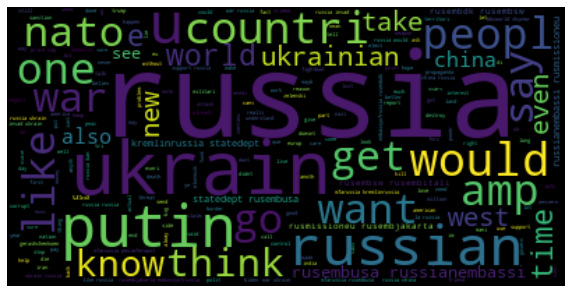

In [16]:
text = " ".join(i for i in data.tweet) 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(stopwords=stopword, background_color='black').generate(text) 
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [17]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer() 
data['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet","Positive","Negative", "Neutral"]]
data.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-17-31d1a6b1eea7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
<ipython-input-17-31d1a6b1eea7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
<ipython-input-17-31d1a6b1eea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,tweet,Positive,Negative,Neutral
0,chainsofolimpo nomorenato nobodi serbia want...,0.149,0.071,0.780
1,bbcstever propaganda russia follow rout germ...,0.182,0.323,0.495
2,russia medvedev fourth reich made germani pola...,0.000,0.000,1.000
3,michelskarl foxnew problem russia want peac w...,0.130,0.270,0.600
4,alexaphilippou ship back russia,0.000,0.000,1.000


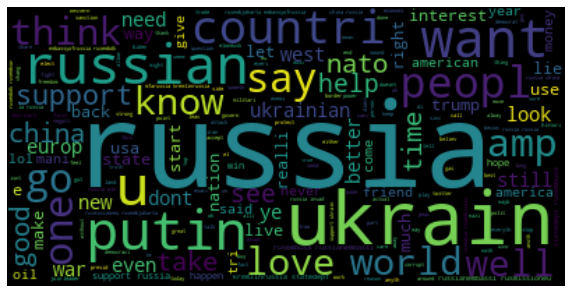

In [21]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

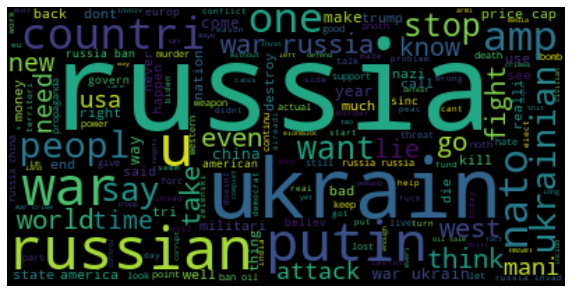

In [22]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()